### Train de perceptron om de Iris-dataset te classificeren

In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns 
import random
import sys
sys.path.append("/Users/marya/OneDrive/Bureaublad/ML")
import perceptron 

C:\Users\marya\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Set de random seed gelijk aan mijn studentennummer zoals het in de opdracht stond.

In [2]:
random.seed(1756450)

We maken eerst een functie aan die random getallen kan genereren.

In [3]:
def random_number(n=1):
    if n == 1:
        return random.randrange(-10, 10)
    else: return [random.randrange(-10, 10) for i in range((n))]

Nu tijd om de data set te loaden en met de opdracht te beginnen! 

In [4]:
iris = load_iris()

__ii. Classificeer daarna alle drie de types, dus ook Verginica. Wat zijn de uiteindelijke parameters van de perceptron?__

We pakken de data en de targets van de dataset. Die gaan we verolgens verder gebruiken bij het trainen van de perceptron.

In [5]:
data, target = iris['data'], iris["target"]

In [6]:
# alle kolommen
def test_alles(data, target):
    perceptronn = perceptron.Perceptron(weights=random_number(4), bias=random_number(), threshold=random_number())  
    print(perceptronn)
    
    for i in range(10):
        for n in range(len(data)):
            perceptronn.update(data[n], target[n])
    print(perceptronn)
    
    return [perceptronn.predict(data[i]) for i in range(len(data))]

In [7]:
predict = test_alles(data, target)

Perceptron: weights=[-6, -4, -5, 2], bias=-8, output =None
Perceptron: weights=[105.32000000000006, -6.189999999999997, 211.95000000000056, 93.86000000000006], bias=-1.8000000000000123, output =1


__Resulaten__

Zoals je hieronder ziet, wordt er ongeveer 33,33% goed geclassficeerd. Dat betenkt dat er alleen 1/3 van de target goed wordt voorspeeld. Dat kunnen we het beste zien in de heatmap hieronder zien. Dat de perceptron zo slecht 3 targets kan voorspellen kan komen omdat het geen lineare probleem is. Dit probeleem kan mogelijk opgelost worden met de sigmoid functie.

In [8]:
accuracy_score(target, predict)

0.3333333333333333

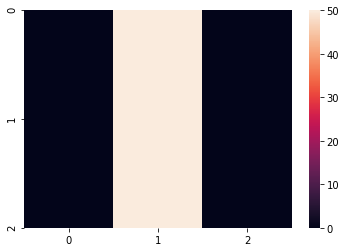

In [9]:
sns.heatmap(confusion_matrix(target, predict))

__Heeft het aantaal features hier invloed op?__

In [10]:
def twee_features(data, target):
    perceptronn = perceptron.Perceptron(weights=random_number(2), bias=random_number(), threshold=random_number())  
    print(perceptronn)
    
    for i in range(10):
        for n in range(len(data)):
            perceptronn.update(data[n], target[n])
    print(perceptronn)
    
    return [perceptronn.predict(data[i]) for i in range(len(data))]

In [11]:
patel_data = data[:,2:]

In [12]:
predict = twee_features(patel_data, target)

Perceptron: weights=[1, -1], bias=-2, output =None
Perceptron: weights=[214.06000000000068, 89.6199999999999], bias=3.3000000000000025, output =1


In [13]:
accuracy_score(target, predict)

0.3333333333333333

____________________

__i.Classificeer eerst alleen de types Setosa en Versicolour. Wat zijn de uiteindelijke parameters van de perceptron?__


In [14]:
def twee_bloemen(data, target):
    perceptronn = perceptron.Perceptron(weights=random_number(4), bias=random_number(), threshold=random_number())  
    print(perceptronn)
    
    for i in range(10):
        for n in range(len(data)):
            perceptronn.update(data[n], target[n])
    print(perceptronn)
    
    return [perceptronn.predict(data[i]) for i in range(len(data))]

In [15]:
twee_iris = data[:100]
twee_iris_target = target[:100]

In [16]:
predict = twee_bloemen(twee_iris, twee_iris_target)

Perceptron: weights=[0, 3, -7, -9], bias=3, output =None
Perceptron: weights=[1.23, -0.44999999999999973, 1.9600000000000026, -5.209999999999978], bias=2.1999999999999993, output =1


In [17]:
accuracy_score(twee_iris_target, predict)

0.5

In [18]:
# laatste twee soorten

In [19]:
twee_target_2 = target[50:]
twee_data = data[50:]

In [20]:
predict = twee_bloemen(twee_data, twee_target_2)

Perceptron: weights=[6, 9, -3, -10], bias=-5, output =None
Perceptron: weights=[335.39999999999975, 157.70000000000013, 274.6, 91.30000000000015], bias=45.00000000000037, output =1


In [21]:
accuracy_score(twee_target_2, predict)

0.5

zoals we uit de score van de accruacy van 2 soorten bloemen, zien we dat een perceptron veel makkelijker twee sorten kan groeperen. Dat kan komen omdat het dan een lineare probleem is.